# Expresso Churn Prediction Challenge


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Parsing DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create Cilent df
client_df = pd.read_csv("/content/drive/MyDrive/Expresso_churn_dataset(1).csv")

# Create variable definition DataFrame
variable_df = pd.read_csv("VariableDefinitions.csv")

In [3]:
variable_df

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [ ]:
# View head
client_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [ ]:
client_df.isnull().mean()* 100

,0
user_id,0.000000
REGION,39.428044
TENURE,0.000000
MONTANT,35.131018
FREQUENCE_RECH,35.131018
REVENUE,33.706213
ARPU_SEGMENT,33.706213
FREQUENCE,33.706213
DATA_VOLUME,49.229776
ON_NET,36.520774


In [ ]:
client_df[~client_df.isnull().any(axis=1)]['CHURN'].value_counts()

,count
CHURN,
0,10823
1,16


In [ ]:
client_df[client_df.isnull().any(axis=1)]['CHURN'].value_counts()

,count
CHURN,
0,1739239
1,403970


In [ ]:
client_df[client_df.isnull().any(axis=1)].shape

(2143209, 19)

In [ ]:
# client_df["MONTANT"] = client_df["MONTANT"].fillna(0)

# client_df['FREQUENCE_RECH'] = client_df["FREQUENCE_RECH"].fillna(0)

# client_df["REVENUE"].fillna(0, inplace=True)

# client_df["ARPU_SEGMENT"].fillna(0, inplace=True)

# client_df["FREQUENCE"].fillna(0, inplace=True)

# client_df['DATA_VOLUME'].fillna(0, inplace=True)

# client_df["ON_NET"].fillna(0, inplace=True)

# client_df['ORANGE'].fillna(0, inplace=True)

# client_df["TIGO"].fillna(0, inplace=True)

# client_df["ZONE1"].fillna(0, inplace=True)

# client_df["ZONE2"].fillna(0, inplace=True)

# client_df["TOP_PACK"] = client_df["TOP_PACK"].fillna("No Top Pack")

# client_df["FREQ_TOP_PACK"] = client_df["FREQ_TOP_PACK"].fillna(0)



In [4]:
client_df["REGION"] = client_df["REGION"].fillna("No Region")

In [5]:
client_df = client_df.drop(columns=["user_id","MRG","ZONE1","ZONE2"])

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

client_df.TENURE=encoder.fit_transform(client_df["TENURE"])

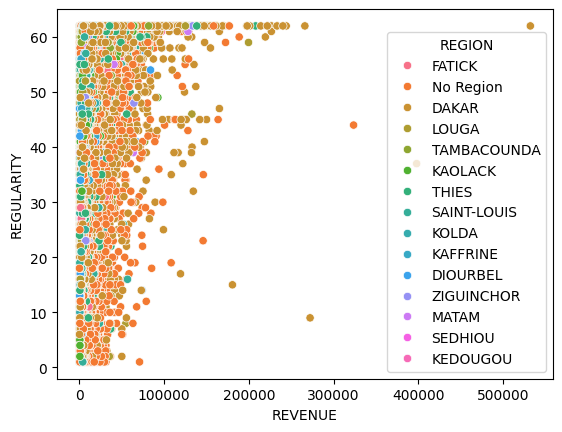

In [ ]:
sns.scatterplot(data= client_df,x="REVENUE",y="REGULARITY",hue="REGION")
plt.show()

In [7]:
encoder=LabelEncoder()

client_df.TOP_PACK=encoder.fit_transform(client_df["TOP_PACK"])


In [8]:
dummy_df=pd.get_dummies(client_df,dtype="int")

In [9]:
dummy_df

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_No Region,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,7,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,...,0,0,0,0,1,0,0,0,0,0
3,7,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,7,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2154044,7,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,...,0,0,0,0,0,0,0,0,1,0
2154045,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2154046,7,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dummy_df.isnull().mean()*100

,0
TENURE,0.000000
MONTANT,35.131018
FREQUENCE_RECH,35.131018
REVENUE,33.706213
ARPU_SEGMENT,33.706213
FREQUENCE,33.706213
DATA_VOLUME,49.229776
ON_NET,36.520774
ORANGE,41.561191
TIGO,59.887988


In [10]:
dummy_df.drop(["ORANGE","TIGO"],axis=1,inplace=True)

In [11]:
yed=dummy_df.corr()

yed

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,TOP_PACK,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_No Region,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
TENURE,1.000000,0.012214,0.003532,0.012523,0.012523,0.002780,-0.024966,0.004066,0.030408,-0.016669,...,0.001468,-0.000721,0.005044,-0.008855,-0.042030,-0.014120,0.000094,0.004685,0.009010,0.009365
MONTANT,0.012214,1.000000,0.792672,0.976558,0.976558,0.775650,0.297847,0.326999,0.522593,-0.113868,...,0.001441,-0.004760,-0.026597,-0.011277,-0.147797,0.017216,-0.005046,0.004477,0.016008,-0.001823
FREQUENCE_RECH,0.003532,0.792672,1.000000,0.800284,0.800283,0.956127,0.150433,0.404998,0.557745,-0.089579,...,-0.002095,0.008825,-0.024952,-0.007952,-0.153392,0.052293,-0.010205,0.019483,0.006738,-0.010429
REVENUE,0.012523,0.976558,0.800284,1.000000,1.000000,0.785681,0.304058,0.332212,0.532103,-0.138072,...,0.000920,-0.004050,-0.025176,-0.010851,-0.154956,0.018554,-0.004989,0.005227,0.017477,-0.002118
ARPU_SEGMENT,0.012523,0.976558,0.800283,1.000000,1.000000,0.785680,0.304058,0.332212,0.532102,-0.138073,...,0.000920,-0.004050,-0.025175,-0.010851,-0.154956,0.018554,-0.004989,0.005227,0.017477,-0.002118
FREQUENCE,0.002780,0.775650,0.956127,0.785681,0.785680,1.000000,0.166603,0.395035,0.591324,-0.088403,...,-0.002245,0.006617,-0.027706,-0.005287,-0.173988,0.049507,-0.009727,0.019136,0.010451,-0.005291
DATA_VOLUME,-0.024966,0.297847,0.150433,0.304058,0.304058,0.166603,1.000000,-0.013524,0.182708,-0.089439,...,-0.003242,-0.028409,-0.036170,-0.016123,-0.018860,-0.021993,-0.004368,-0.029105,-0.008939,-0.003548
ON_NET,0.004066,0.326999,0.404998,0.332212,0.332212,0.395035,-0.013524,1.000000,0.270357,0.134609,...,0.001833,0.024381,0.032653,0.009016,-0.077022,0.038093,-0.003829,0.022331,0.020512,-0.007807
REGULARITY,0.030408,0.522593,0.557745,0.532103,0.532102,0.591324,0.182708,0.270357,1.000000,-0.517707,...,0.000683,0.073320,0.103984,0.036784,-0.533203,0.122174,0.003696,0.084371,0.133856,0.021361
TOP_PACK,-0.016669,-0.113868,-0.089579,-0.138072,-0.138073,-0.088403,-0.089439,0.134609,-0.517707,1.000000,...,-0.003267,-0.013491,-0.051042,-0.024823,0.378519,-0.078377,-0.011889,-0.035846,-0.099815,-0.023417


<Axes: >

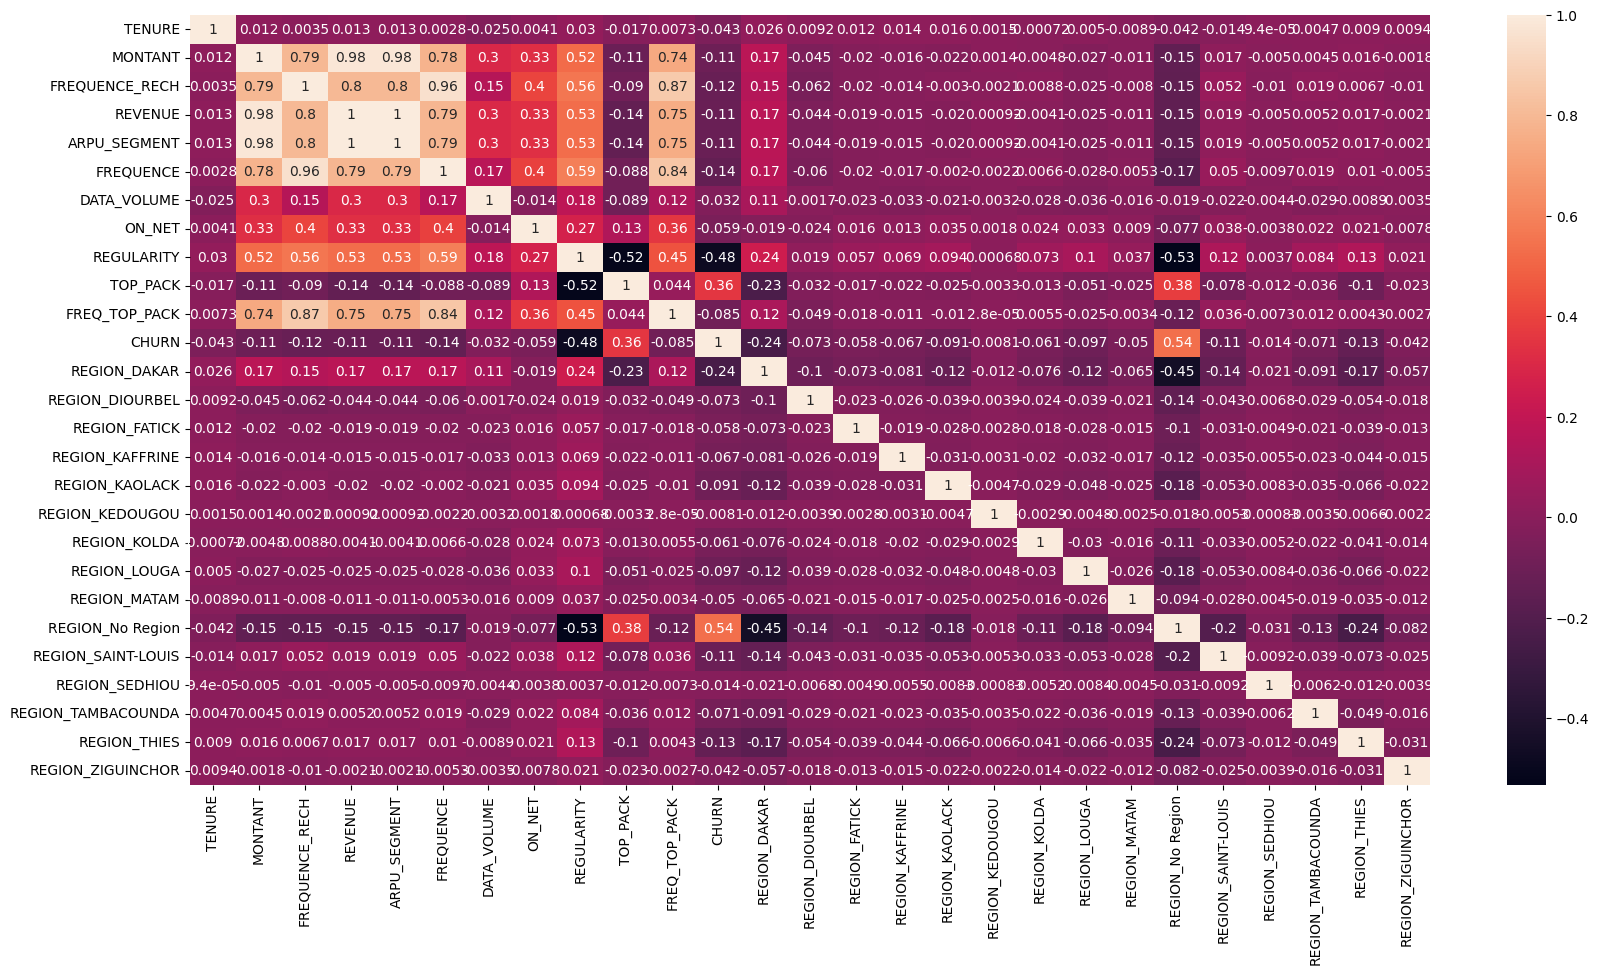

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(yed,annot=True)

In [12]:
abs(yed["CHURN"]).sort_values(ascending=False)

,CHURN
CHURN,1.000000
REGION_No Region,0.538294
REGULARITY,0.479991
TOP_PACK,0.357730
REGION_DAKAR,0.241162
FREQUENCE,0.139363
REGION_THIES,0.132493
FREQUENCE_RECH,0.123439
ARPU_SEGMENT,0.114079
REVENUE,0.114079


In [ ]:
dummy_df

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,TOP_PACK,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_No Region,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,54,107,...,0,0,0,0,0,0,0,0,0,0
1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,140,...,0,0,0,0,1,0,0,0,0,0
2,7,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,17,108,...,0,0,0,0,1,0,0,0,0,0
3,7,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,62,35,...,0,0,0,0,0,0,0,0,0,0
4,7,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,11,100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,140,...,0,0,0,0,1,0,0,0,0,0
2154044,7,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,55,31,...,0,0,0,0,0,0,0,0,1,0
2154045,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,140,...,0,0,0,0,1,0,0,0,0,0
2154046,7,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,28,18,...,0,0,0,0,0,0,0,0,1,0


In [13]:
for col in dummy_df.select_dtypes(include="number").columns:
    dummy_df[col] = dummy_df[col].fillna(0)

In [14]:
corr_table=abs(yed["CHURN"]).sort_values(ascending=False)

In [16]:
corr_table.drop("CHURN",inplace=True)

In [18]:
corr_table

,CHURN
REGION_No Region,0.538294
REGULARITY,0.479991
TOP_PACK,0.357730
REGION_DAKAR,0.241162
FREQUENCE,0.139363
REGION_THIES,0.132493
FREQUENCE_RECH,0.123439
ARPU_SEGMENT,0.114079
REVENUE,0.114079
REGION_SAINT-LOUIS,0.108755


In [19]:
pred_columns=corr_table[corr_table > 0.20].index

pred_columns

Index(['REGION_No Region', 'REGULARITY', 'TOP_PACK', 'REGION_DAKAR'], dtype='object')

In [20]:
dummy_df

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,TOP_PACK,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_No Region,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,54,107,...,0,0,0,0,0,0,0,0,0,0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,140,...,0,0,0,0,1,0,0,0,0,0
2,7,3600.0,2.0,1020.0,340.0,2.0,0.0,90.0,17,108,...,0,0,0,0,1,0,0,0,0,0
3,7,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,62,35,...,0,0,0,0,0,0,0,0,0,0
4,7,1000.0,1.0,985.0,328.0,1.0,0.0,39.0,11,100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,140,...,0,0,0,0,1,0,0,0,0,0
2154044,7,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,55,31,...,0,0,0,0,0,0,0,0,1,0
2154045,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,140,...,0,0,0,0,1,0,0,0,0,0
2154046,7,10000.0,11.0,7120.0,2373.0,13.0,0.0,0.0,28,18,...,0,0,0,0,0,0,0,0,1,0


In [22]:
x = dummy_df[pred_columns]
y = dummy_df["CHURN"]

In [ ]:
# x.boxplot()
# plt.show()

In [ ]:
x

,REGION_No Region,REGULARITY,TOP_PACK,REGION_DAKAR,FREQUENCE,REGION_THIES,FREQUENCE_RECH,ARPU_SEGMENT,REVENUE,REGION_SAINT-LOUIS,MONTANT
0,0,54,107,0,17.0,0,15.0,1417.0,4251.0,0,4250.0
1,1,4,140,0,0.0,0,0.0,0.0,0.0,0,0.0
2,1,17,108,0,2.0,0,2.0,340.0,1020.0,0,3600.0
3,0,62,35,1,18.0,0,15.0,4501.0,13502.0,0,13500.0
4,0,11,100,1,1.0,0,1.0,328.0,985.0,0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...
2154043,1,6,140,0,0.0,0,0.0,0.0,0.0,0,0.0
2154044,0,55,31,0,15.0,1,15.0,1933.0,5800.0,0,6100.0
2154045,1,1,140,0,0.0,0,0.0,0.0,0.0,0,0.0
2154046,0,28,18,0,13.0,1,11.0,2373.0,7120.0,0,10000.0


In [23]:
from sklearn.preprocessing import QuantileTransformer
quantile= QuantileTransformer()
Transformed=quantile.fit_transform(x)


In [ ]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE()
# x_smote,y_smote=smote.fit_resample(Transformed,y)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Transformed, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rdf = RandomForestClassifier()

rdf.fit(X_train, y_train)

test_preds = rdf.predict(X_test)

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93    350013
           1       0.69      0.64      0.66     80797

    accuracy                           0.88    430810
   macro avg       0.80      0.78      0.79    430810
weighted avg       0.87      0.88      0.88    430810



In [ ]:
pd.DataFrame(rdf.feature_importances_, index= x.columns, columns=["Importances"]).sort_values(by="Importances", ascending=False)

,Importances
REGULARITY,0.295812
REGION_No Region,0.240735
REVENUE,0.143463
ARPU_SEGMENT,0.105556
FREQUENCE,0.071324
MONTANT,0.043296
FREQUENCE_RECH,0.036885
TOP_PACK,0.035144
REGION_DAKAR,0.019599
REGION_THIES,0.005494


In [26]:
pip install joblib

In [30]:
import joblib
from google.colab import files

In [31]:
with open("random_forest_model.pkl(2)","wb") as file:
    joblib.dump(rdf,file,compress=3)
    files.download("random_forest_model.pkl(2)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
client_df.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [ ]:
client_df.MRG.unique()

array(['NO'], dtype=object)

In [ ]:
df_copy = client_df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for cols in client_df.select_dtypes("object").columns:
    client_df[cols] = encoder.fit_transform(client_df[cols])

In [ ]:
client_df.dtypes

REGION              int32
TENURE              int32
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                 int32
REGULARITY          int64
TOP_PACK            int32
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [ ]:
client_df = client_df.drop(columns="MRG")

In [ ]:
corr_matrix = client_df.corr()

In [ ]:
corr_matrix["CHURN"].sort_values(ascending=False)

CHURN             1.000000
TOP_PACK          0.276070
REGION            0.240042
ZONE1            -0.018589
ZONE2            -0.018603
TENURE           -0.043058
DATA_VOLUME      -0.067242
TIGO             -0.098621
ON_NET           -0.112571
ORANGE           -0.151865
FREQ_TOP_PACK    -0.224544
MONTANT          -0.243353
REVENUE          -0.244202
ARPU_SEGMENT     -0.244203
FREQUENCE_RECH   -0.268474
FREQUENCE        -0.289405
REGULARITY       -0.479991
Name: CHURN, dtype: float64

In [ ]:
high_corr_columns = list(abs(corr_matrix["CHURN"]).sort_values(ascending=False).index[:13])

In [ ]:
high_corr_columns

['CHURN',
 'REGULARITY',
 'FREQUENCE',
 'TOP_PACK',
 'FREQUENCE_RECH',
 'ARPU_SEGMENT',
 'REVENUE',
 'MONTANT',
 'REGION',
 'FREQ_TOP_PACK',
 'ORANGE',
 'ON_NET',
 'TIGO']

In [ ]:
client_df = client_df[high_corr_columns]

<Axes: >

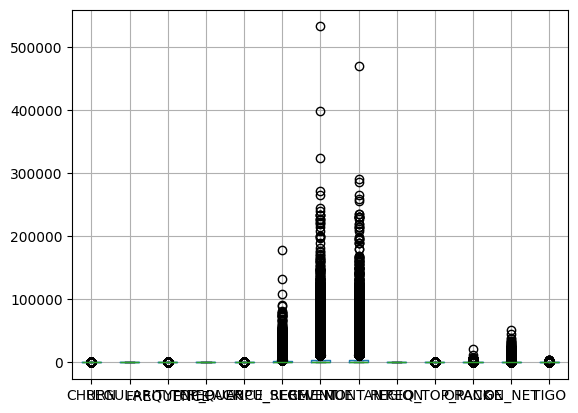

In [ ]:
client_df.boxplot()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = client_df.drop(columns="CHURN")

y = client_df["CHURN"]

X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

test_preds = log_reg.predict(X_test)

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92    350013
           1       0.63      0.64      0.64     80797

    accuracy                           0.86    430810
   macro avg       0.78      0.78      0.78    430810
weighted avg       0.86      0.86      0.86    430810



In [ ]:
train_preds = rdf.predict(X_train)

print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94   1400049
           1       0.74      0.79      0.76    323189

    accuracy                           0.91   1723238
   macro avg       0.84      0.86      0.85   1723238
weighted avg       0.91      0.91      0.91   1723238



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)


train_preds = dec_tree.predict(X_train)
print(classification_report(y_train, train_preds))


test_preds = dec_tree.predict(X_test)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94   1400049
           1       0.74      0.79      0.76    323189

    accuracy                           0.91   1723238
   macro avg       0.85      0.86      0.85   1723238
weighted avg       0.91      0.91      0.91   1723238

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    350013
           1       0.62      0.68      0.65     80797

    accuracy                           0.86    430810
   macro avg       0.77      0.79      0.78    430810
weighted avg       0.87      0.86      0.86    430810

